**In this notebook:** 
    
    - I plot the selected assortativity parameter combinations which lead to a positive expanded contact matrix

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import cm
import math
import random

import geopandas as gp 
from shapely.geometry import Point, LineString

import datetime as dt

import time

import scipy.stats as st

import seaborn as sns

In [21]:
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.facecolor']='white'

# population

In [22]:
# # read population data

data_pop_grouped = pd.read_csv("./../data/pop_size_by_age_SEP_edu.csv")

dict_pop_full = dict(zip(data_pop_grouped[['age_group',
                           'sep_level', 'edu_level']].apply(lambda x:
                                               x[0]+", "+x[1]+", "+x[2], axis=1).values,
                   data_pop_grouped['population']))
                   
pop_age = data_pop_grouped.groupby('age_group')['population'].sum()
pop_age = dict(zip(pop_age.index, pop_age.values))

distrib_pop = data_pop_grouped.groupby('age_group')['population'].sum()/data_pop_grouped['population'].sum()
distrib_pop = dict(zip(distrib_pop.index, distrib_pop.values))

# histograms of selected parameter combinations 

In [23]:
q1_edu_min, q2_edu_min, q3_edu_min = (0.9, 0.13, 0.55)

q12_sep_max = 0.77
q13_sep_max = 0.62 
q23_sep_max = 0.94

q12_edu_min, q12_edu_max = 0.49, 0.62
q13_edu_min, q13_edu_max = 0.53, 0.75
q23_edu_min, q23_edu_max = 0.43, 1.2

q02_sep_max = 0.99
q03_sep_max = 0.76

q01_edu_min = 0.93
q02_edu_min = 0.51
q03_edu_min = 0.44

## diagonal blocks

rnd_seed = 29
random.seed(rnd_seed)

df_qs = pd.DataFrame({'q_sep':[]})

for i in range(10000):
    q1_sep = np.random.uniform(0., 1.0)
    
    df_qs = pd.concat([df_qs, pd.DataFrame({'q_sep': [q1_sep]})], 
                                         ignore_index=True)
        
df_qs.to_csv('./parameter_space_exploration/df_qs_0_seed29_10000.csv', index=False)
        
len(df_qs)

In [24]:
df_qs_0 = pd.read_csv('./parameter_space_exploration/df_qs_0_seed29_10000.csv', header=0)

df_qs_0.tail()

,q_sep
9995,0.556589
9996,0.003038
9997,0.731657
9998,0.661948
9999,0.188450


In [25]:
df_qs_1 = pd.read_csv('./parameter_space_exploration/df_qs_1_seed29_2000000_constrained.csv', header=0)

df_qs_1.tail()

,q11,q12,q21,q22,q_sep,q_edu
3594,0.837517,0.039378,0.942691,0.258143,0.847486,0.949661
3595,0.129947,0.117123,0.447183,0.337318,0.168843,0.946738
3596,0.271175,0.682445,0.556009,0.096171,0.350947,0.952279
3597,0.876495,0.601172,0.900633,0.261413,0.863449,0.965194
3598,0.418588,0.138669,0.724249,0.684707,0.553952,0.952812


In [26]:
df_qs_2 = pd.read_csv('./parameter_space_exploration/df_qs_2_seed29_2000000_constrained.csv', header=0)

df_qs_2.tail()

,q11,q12,q21,q22,q_sep,q_edu
35084,0.083299,0.381777,0.590255,0.661799,0.566293,0.644221
35085,0.306844,0.323340,0.312937,0.395531,0.694671,0.477533
35086,0.053065,0.359665,0.629779,0.608424,0.247684,0.756418
35087,0.000682,0.025324,0.379344,0.360840,0.305186,0.446756
35088,0.301793,0.440056,0.624330,0.649599,0.430269,0.697945


In [27]:
df_qs_3 = pd.read_csv('./parameter_space_exploration/df_qs_3_seed29_2000000_constrained.csv', header=0)

df_qs_3.tail()

,q11,q12,q21,q22,q_sep,q_edu
20906,0.052361,0.039547,0.441443,0.374455,0.226229,0.692388
20907,0.633015,0.314284,0.491281,0.015629,0.571493,0.703707
20908,0.058473,0.251593,0.551927,0.097859,0.330012,0.649710
20909,0.037974,0.248614,0.358874,0.665195,0.171316,0.813152
20910,0.288378,0.552829,0.440284,0.274423,0.435085,0.730770


In [28]:
param_notation = dict(zip(['q11', 'q12', 'q21', 'q22', 'r1', 'r2', 'r3', 'q_sep', 'q_edu'],
                           [r'$q_{v_1,d_1}$', r'$q_{v_1,d_2}$', r'$q_{v_2,d_1}$', r'$q_{v_2,d_2}$', 
                            r'$r_1$', r'$r_2$', r'$r_3$', 
                            r'$q_{v_1}$', r'$q_{d_1}$']))

In [29]:
dict_pop_full

{'0-14, high SEP, high edu': 0.0,
 '0-14, low SEP, high edu': 0.0,
 '0-14, high SEP, low edu': 910215.0,
 '0-14, low SEP, low edu': 413202.0,
 '15-24, high SEP, high edu': 51812.0,
 '15-24, low SEP, high edu': 24823.0,
 '15-24, high SEP, low edu': 552631.0,
 '15-24, low SEP, low edu': 264751.0,
 '25-64, high SEP, high edu': 1687317.3094791055,
 '25-64, low SEP, high edu': 536759.268093747,
 '25-64, high SEP, low edu': 1727216.6905208929,
 '25-64, low SEP, low edu': 938743.7319062528,
 '65+, high SEP, high edu': 349133.05628178443,
 '65+, low SEP, high edu': 111064.1150329906,
 '65+, high SEP, low edu': 799172.9437182155,
 '65+, low SEP, low edu': 427282.8849670094}

In [30]:
df_qs_1['q_edu'].min(), df_qs_2['q_edu'].min(), df_qs_3['q_edu'].min(), 

(0.9105958048356142, 0.1488497301285313, 0.5671697493804742)

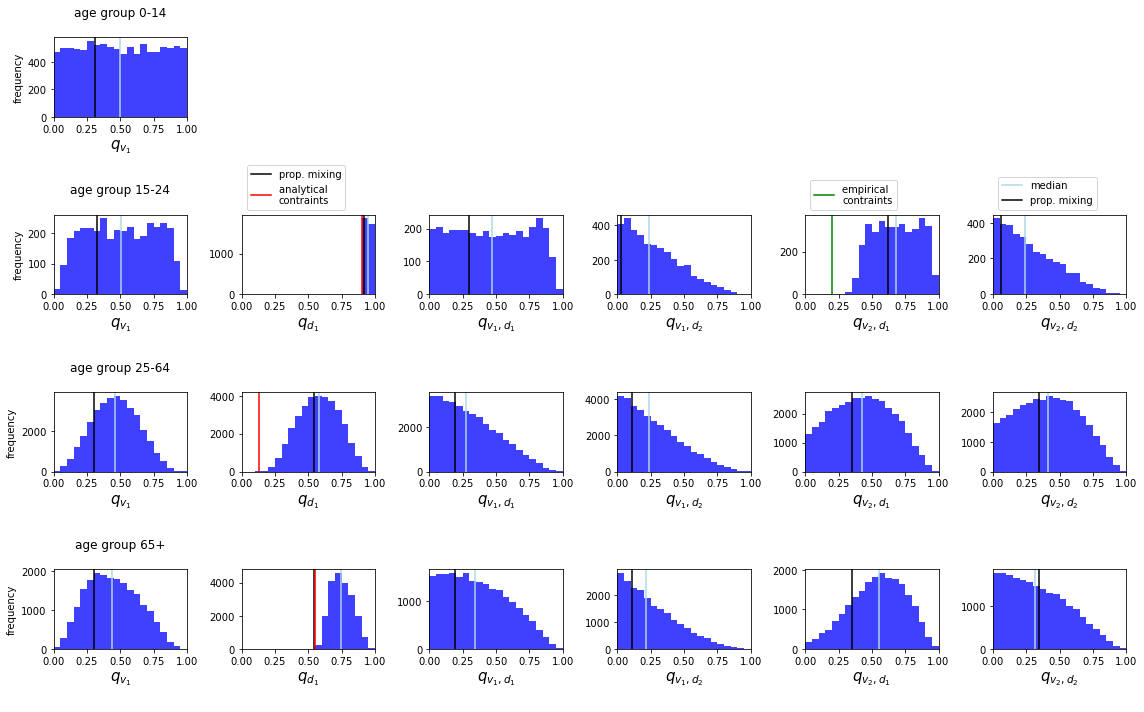

In [31]:
# Create a figure with 6 subplots in a 2x3 grid
fig, axes = plt.subplots(4, 6, figsize=(16, 10))

# Loop over each axis and plot a histogram
for i, ax in enumerate(axes.flatten()):
    
    if i in [1,2,3,4,5]:
        ax.set_visible(False)
        
    if i < 6:
        age_j = '0-14'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_0.copy()        
    elif i < 12:
        age_j = '15-24'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_1.copy()
    elif i<18:
        age_j = '25-64'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_2.copy()
    else: 
        age_i = '65+'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_3.copy()
        
    if age_j != '0-14':
        df_qs = df_qs[['q_sep', 'q_edu', 'q11', 'q12', 'q21', 'q22']].copy()
        ax.hist(df_qs[df_qs.columns[i%6]], bins=np.arange(0.0,1.01,0.05), 
                alpha=0.75, color='blue')
        ax.axvline(x = df_qs[df_qs.columns[i%6]].median(), color="lightblue", 
                   label = "median" if i == 6+5 else "")
        ax.set_xlabel(param_notation[df_qs.columns[i%6]]+'\n', fontsize=15)
    else:
        if i == 0:
            ax.hist(df_qs[df_qs.columns[i%6]], bins=np.arange(0.0,1.01,0.05), 
                    alpha=0.75, color='blue')
            ax.axvline(x = df_qs[df_qs.columns[i%6]].median(), color="lightblue", 
                       label = "median" if i == 6+5 else "")
            ax.set_xlabel(param_notation[df_qs.columns[i%6]]+'\n', fontsize=15)
            
        
    ax.set_xlim([0., 1.])
    
    tag_11 = ', low SEP, low edu'
    tag_12 = ', low SEP, high edu'
    tag_21 = ', high SEP, low edu'
    tag_22 = ', high SEP, high edu'

    if i in [6+2,12+2,18+2]:
        k = age_j+tag_11
        N_edusep = dict_pop_full[k]
        ax.axvline(x = N_edusep/N_age_j , color="black")
    if i in [6+3,12+3,18+3]:
        k = age_j+tag_12
        N_edusep = dict_pop_full[k]
        ax.axvline(x = N_edusep/N_age_j , color="black")
    if i in [6+4,12+4,18+4]:
        k = age_j+tag_21
        N_edusep = dict_pop_full[k]
        ax.axvline(x = N_edusep/N_age_j , color="black")
    if i in [6+5,12+5,18+5]:
        k = age_j+tag_22
        N_edusep = dict_pop_full[k]
        ax.axvline(x = N_edusep/N_age_j , color="black", label = "prop. mixing") 
        if i == 6+5:
            ax.legend(bbox_to_anchor=(0,1), loc='lower left')
            
    if i in [0,6,12,18]:
        k1 = age_j+tag_11
        k2 = age_j+tag_12
        N_sep = dict_pop_full[k1]+dict_pop_full[k2]
        ax.axvline(x = N_sep/N_age_j , color="black", label = "prop. mixing") 

    if i in [0+1,6+1,12+1,18+1]:
        k1 = age_j+tag_11
        k2 = age_j+tag_21
        N_edu = dict_pop_full[k1]+dict_pop_full[k2]
        ax.axvline(x = N_edu/N_age_j , color="black", label = "prop. mixing") 
        
    if i == 6+4:
        ax.axvline(x=0.2, color="green", label = 'empirical \ncontraints')
        ax.legend(bbox_to_anchor=(0,1), loc='lower left')
    if i == 6+1:
        ax.axvline(x=q1_edu_min, color="red", label = 'analytical \ncontraints')
        ax.legend(bbox_to_anchor=(0,1), loc='lower left')
    if i == 12+1:
        ax.axvline(x=q2_edu_min, color="red")
    if i == 18+1:
        ax.axvline(x=q3_edu_min, color="red")
        
    if i in [0,6,12,18]:
        ax.set_ylabel("frequency")

    if i==0:
        ax.set_title('age group 0-14\n')
    if i==6:
        ax.set_title('age group 15-24\n')
    if i==12:
        ax.set_title('age group 25-64\n')
    if i==18:
        ax.set_title('age group 65+\n')
    
# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.savefig("./../output/figures/selected_param_hist_diag_block.png", dpi=250)
plt.show()

## off-diagonal blocks

In [32]:
df_qs_12 = pd.read_csv('./parameter_space_exploration/df_qs_12_seed29_2000000_constrained.csv', header=0)

df_qs_12.tail()

,q11,q12,q21,q22,r1,r2,r3,q_sep,q_edu
148,0.268679,0.103757,0.372931,0.709542,0.324895,0.643554,0.746114,0.480823,0.565553
149,0.450871,0.353008,0.501877,0.264942,0.238439,0.064462,0.839797,0.599379,0.545116
150,0.153514,0.180121,0.207713,0.053202,0.151563,0.154239,0.649929,0.305072,0.531817
151,0.538374,0.008780,0.467976,0.044989,0.564669,0.076230,0.969468,0.697278,0.556933
152,0.222727,0.121993,0.301767,0.438778,0.087924,0.684122,0.640768,0.291009,0.554480


In [33]:
df_qs_23 = pd.read_csv('./parameter_space_exploration/df_qs_23_seed29_2000000_constrained.csv', header=0)

df_qs_23.tail()

,q11,q12,q21,q22,r1,r2,r3,q_sep,q_edu
682,0.402750,0.182506,0.409622,0.288744,0.198442,0.470629,0.378458,0.511526,0.671049
683,0.259009,0.287308,0.240012,0.000796,0.074556,0.040760,0.528579,0.472292,0.572695
684,0.570692,0.121296,0.755630,0.304080,0.359832,0.001765,0.866003,0.625832,0.780011
685,0.100103,0.028243,0.752287,0.151728,0.088274,0.224929,0.227937,0.190245,0.730853
686,0.364668,0.016728,0.526577,0.075895,0.169998,0.596765,0.722369,0.386963,0.535110


In [34]:
df_qs_13 = pd.read_csv('./parameter_space_exploration/df_qs_13_seed29_2000000_constrained.csv', header=0)

df_qs_13.tail()

,q11,q12,q21,q22,r1,r2,r3,q_sep,q_edu
210,0.370215,0.052336,0.627550,0.025688,0.076249,0.700064,0.520401,0.340490,0.589655
211,0.256164,0.477950,0.754517,0.011651,0.185881,0.450720,0.931753,0.475584,0.592252
212,0.274949,0.333964,0.605252,0.023995,0.228549,0.008485,0.985266,0.447342,0.649693
213,0.275720,0.047651,0.692770,0.552003,0.221278,0.174310,0.839303,0.479509,0.640982
214,0.254130,0.137781,0.624345,0.488875,0.104399,0.235745,0.689770,0.409597,0.616759


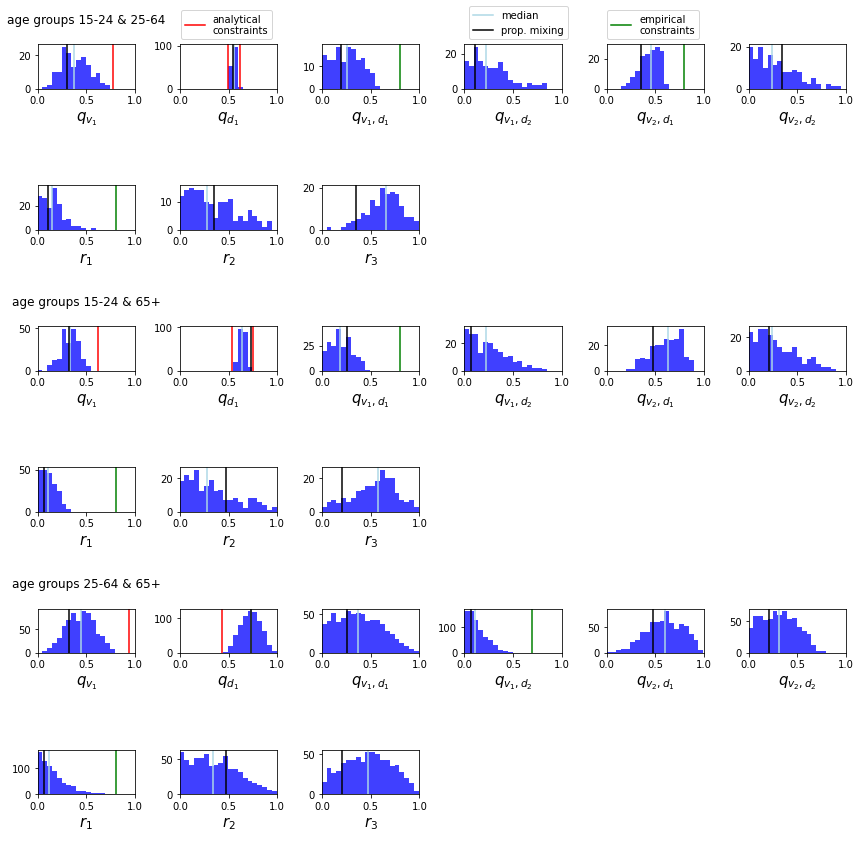

In [35]:
# Create a figure with 6 subplots in a 2x3 grid
fig, axes = plt.subplots(6, 6, figsize=(12, 12))

# Loop over each axis and plot a histogram
for i, ax in enumerate(axes.flatten()):
    
    if i < 12:
        age_j = '25-64'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_12.copy()
    elif i < 24:
        age_j = '65+'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_13.copy()
    else: 
        age_i = '65+'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_23.copy()

    df_qs = df_qs[['q_sep', 'q_edu', 'q11', 'q12', 'q21', 'q22', 'r1', 'r2', 'r3']].copy()
        
    if i in [9,10,11,21,22,23,33,34,35]:
        ax.set_visible(False)
    else:            
        ax.hist(df_qs[df_qs.columns[i%12]], bins=np.arange(-0.005,1.05,0.05), 
                alpha=0.75, color='blue')
        ax.axvline(x = df_qs[df_qs.columns[i%12]].median(), color="lightblue", 
                   label = "median" if i == 3 else "")
        
        tag_11 = ', low SEP, low edu'
        tag_12 = ', low SEP, high edu'
        tag_21 = ', high SEP, low edu'
        tag_22 = ', high SEP, high edu'
        
        if i in [0+2,12+2,24+2]:
            k = age_j+tag_11
            N_edusep = dict_pop_full[k]
            ax.axvline(x = N_edusep/N_age_j , color="black")
        if i in [0+3,12+3,24+3]:
            k = age_j+tag_12
            N_edusep = dict_pop_full[k]
            ax.axvline(x = N_edusep/N_age_j , color="black", label = "prop. mixing") 
            if i == 3:
                ax.legend(bbox_to_anchor=(0,1), loc='lower left')
        if i in [0+4,12+4,24+4]:
            k = age_j+tag_21
            N_edusep = dict_pop_full[k]
            ax.axvline(x = N_edusep/N_age_j , color="black")
        if i in [0+5,12+5,24+5]:
            k = age_j+tag_22
            N_edusep = dict_pop_full[k]
            ax.axvline(x = N_edusep/N_age_j , color="black")

        if i in [0,12,24]:
            k1 = age_j+tag_11
            k2 = age_j+tag_12
            N_sep = dict_pop_full[k1]+dict_pop_full[k2]
            ax.axvline(x = N_sep/N_age_j , color="black")
        if i in [0+1,12+1,24+1]:
            k1 = age_j+tag_11
            k2 = age_j+tag_21
            N_edu = dict_pop_full[k1]+dict_pop_full[k2]
            ax.axvline(x = N_edu/N_age_j , color="black")
                
        if i in [0+6,12+6,24+6]:
            k = age_j+tag_12
            N_edusep = dict_pop_full[k]
            ax.axvline(x = N_edusep/N_age_j , color="black")
        if i in [0+7,12+7,24+7]:
            k = age_j+tag_21
            N_edusep = dict_pop_full[k]
            ax.axvline(x = N_edusep/N_age_j , color="black")
        if i in [0+8,12+8,24+8]:
            k = age_j+tag_22
            N_edusep = dict_pop_full[k]
            ax.axvline(x = N_edusep/N_age_j , color="black")
            
        if i == 2:
            ax.axvline(x=0.8, color="green")
        if i == 4:
            ax.axvline(x=0.8, color="green", label='empirical\nconstraints')
            ax.legend(bbox_to_anchor=(1,1), loc='lower right')
        if i == 6:
            ax.axvline(x=0.8, color="green")
            
        if i == 0:
            ax.axvline(x=q12_sep_max, color="red")
        if i == 1:
            ax.axvline(x=q12_edu_max, color="red", label='analytical\nconstraints')
            ax.legend(bbox_to_anchor=(1,1), loc='lower right')
            ax.axvline(x=q12_edu_min, color="red")

        if i == 12+2:
            ax.axvline(x=0.8, color="green")
        if i == 18:
            ax.axvline(x=0.8, color="green")   

        if i == 12:
            ax.axvline(x=q13_sep_max, color="red")
        if i == 12+1:
            ax.axvline(x=q13_edu_max, color="red")
            ax.axvline(x=q13_edu_min, color="red")

        if i == 24+3:
            ax.axvline(x=0.7, color="green")
        if i == 30:
            ax.axvline(x=0.8, color="green")
        if i == 24:
            ax.axvline(x=q23_sep_max, color="red")
        if i == 24+1:
            ax.axvline(x=q23_edu_max, color="red")
            ax.axvline(x=q23_edu_min, color="red")

        ax.set_xlim([0., 1.])
        ax.set_xlabel(param_notation[df_qs.columns[i%12]]+'\n', fontsize=15)

        if i==0:
            ax.set_title('age groups 15-24 & 25-64\n')
        if i==12:
            ax.set_title('age groups 15-24 & 65+\n')
        if i==24:
            ax.set_title('age groups 25-64 & 65+\n')
    
# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.savefig("./../output/figures/selected_param_hist_diag_offblock.png", dpi=250)

plt.show()

### off diagonal blocks with children 0-15

In [36]:
df_qs_01 = pd.read_csv('./parameter_space_exploration/df_qs_01_seed29_2000000.csv', header=0)

df_qs_01.tail()

,q11,q21,q_sep
7080,0.784664,0.757705,0.785897
7081,0.787261,0.799551,0.903268
7082,0.437438,0.654798,0.546549
7083,0.253405,0.524307,0.285500
7084,0.520266,0.685781,0.637659


In [37]:
df_qs_02 = pd.read_csv('./parameter_space_exploration/df_qs_02_seed29_2000000.csv', header=0)

df_qs_02.tail()

,q11,q21,q_sep
105522,0.025879,0.197993,0.161118
105523,0.141707,0.215050,0.179683
105524,0.467904,0.341786,0.530401
105525,0.454476,0.446529,0.573185
105526,0.040007,0.281400,0.196512


In [38]:
df_qs_03 = pd.read_csv('./parameter_space_exploration/df_qs_03_seed29_2000000.csv', header=0)

df_qs_03.tail()

,q11,q21,q_sep
61210,0.174025,0.007071,0.199863
61211,0.355378,0.183800,0.367362
61212,0.064972,0.280383,0.082447
61213,0.149679,0.279198,0.223389
61214,0.148288,0.340345,0.192294


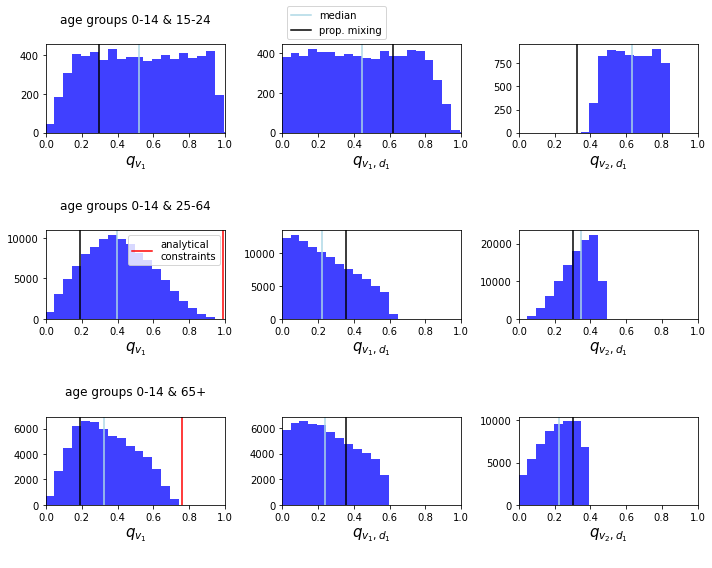

In [39]:
# Create a figure with 6 subplots in a 2x3 grid
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

# Loop over each axis and plot a histogram
for i, ax in enumerate(axes.flatten()):
    
    if i < 3:
        age_j = '15-24'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_01.copy()
    elif i< 6:
        age_j = '25-64'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_02.copy()
    else: 
        age_i = '65+'
        N_age_j = sum([dict_pop_full[k] for k in dict_pop_full.keys() if age_j in k])
        df_qs = df_qs_03.copy()

    df_qs = df_qs[['q_sep', 'q11', 'q21']].copy()
                   
    ax.hist(df_qs[df_qs.columns[i%3]], bins=np.arange(-0.005,1.05,0.05), 
            alpha=0.75, color='blue')
    ax.axvline(x = df_qs[df_qs.columns[i%3]].median(), color="lightblue", 
               label = "median" if i == 1 else "")

    if i in [0,3,6]:
        k = age_j+tag_11
        N_edusep = dict_pop_full[k]
        ax.axvline(x = N_edusep/N_age_j , color="black")
    if i in [0+1,3+1,6+1]:
        k = age_j+tag_21
        N_edusep = dict_pop_full[k]
        ax.axvline(x = N_edusep/N_age_j , color="black", label='prop. mixing')
        if i == 1:
            ax.legend(bbox_to_anchor=(0,1), loc='lower left')

    if i in [0+2,3+2,6+2]:
        k1 = age_j+tag_11
        k2 = age_j+tag_12
        N_sep = dict_pop_full[k1]+dict_pop_full[k2]
        ax.axvline(x = N_sep/N_age_j , color="black")

    if i == 3:
        ax.axvline(x=q02_sep_max, color="red", label='analytical\nconstraints')
        ax.legend(bbox_to_anchor=(1,1), loc='upper right')
    if i == 6:
        ax.axvline(x=q03_sep_max, color="red")

    ax.set_xlim([0., 1.])
    ax.set_xlabel(param_notation[df_qs.columns[i%3]]+'\n', fontsize=15)

    if i==0:
        ax.set_title('age groups 0-14 & 15-24\n')
    if i==3:
        ax.set_title('age groups 0-14 & 25-64\n')
    if i==6:
        ax.set_title('age groups 0-14 & 65+\n')
    
# Adjust the layout to prevent overlap
plt.tight_layout()

plt.savefig("./../output/figures/selected_param_hist_diag_offblock_children.png", dpi=250)
plt.show()